<a href="https://colab.research.google.com/github/paritachavda/Computer-Vision/blob/master/lab_3_colour_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colour detection using filters


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('./drive/My Drive/computer vision/circles.jpg')
# img = cv2.resize(image,(256,256))

In [0]:
# extract_r = np.ones([3,3,3])/-9
# extract_g = np.ones([3,3,3])/-9
# extract_b = np.ones([3,3,3])/-9
# extract_b[:,:,0] = np.ones([3,3])/9
# extract_g[:,:,1] = np.ones([3,3])/9
# extract_r[:,:,2] = np.ones([3,3])/9

In [0]:
extract_r = np.ones([3,3,3])*8/9
extract_g = np.ones([3,3,3])*8/9
extract_b = np.ones([3,3,3])*8/9
sobel = [[-1.0, -2.0, -1.0],[0., 0., 0.],[1.0,2.0,1.0]]


extract_b[:,:,1] = sobel
extract_b[:,:,2] = sobel

extract_g[:,:,0] = sobel
extract_g[:,:,2] = sobel

extract_r[:,:,0] = sobel
extract_r[:,:,1] = sobel

extract_r = extract_r/8
extract_g = extract_g/8
extract_b = extract_b/8

In [0]:
extract_r

array([[[-1., -1.,  1.],
        [-2., -2.,  1.],
        [-1., -1.,  1.]],

       [[ 0.,  0.,  1.],
        [ 0.,  0.,  1.],
        [ 0.,  0.,  1.]],

       [[ 1.,  1.,  1.],
        [ 2.,  2.,  1.],
        [ 1.,  1.,  1.]]])

In [0]:
def convolve3D(image,kernel):
  tmp = kernel.shape[0]
  opx = image.shape[0] - tmp + 1
  opy = image.shape[1] - tmp + 1
  op_img = np.zeros([opx,opy])
  for img_i in range(1,image.shape[0]-1):
    for img_j in range(1,image.shape[1]-1):
      op_pix_val = 0.0
      for i in range(-1,2):
        for j in range(-1,2):
          for k in range(-1,2):
            op_pix_val = op_pix_val + (image[img_i+i,img_j+j,1+k]*kernel[i+1,j+1,k+1])
      if op_pix_val > 0:
        op_img[img_i-1,img_j-1] = int(op_pix_val)
      else:
        op_img[img_i-1,img_j-1] = 0
  return op_img
            

In [0]:
# img = cv2.imread("/content/gdrive/My Drive/Colab Notebooks/CV/circles.jpg")
red = convolve3D(img,extract_r)
# green = convolve3D(img,extract_g)
# blue = convolve3D(img,extract_b)

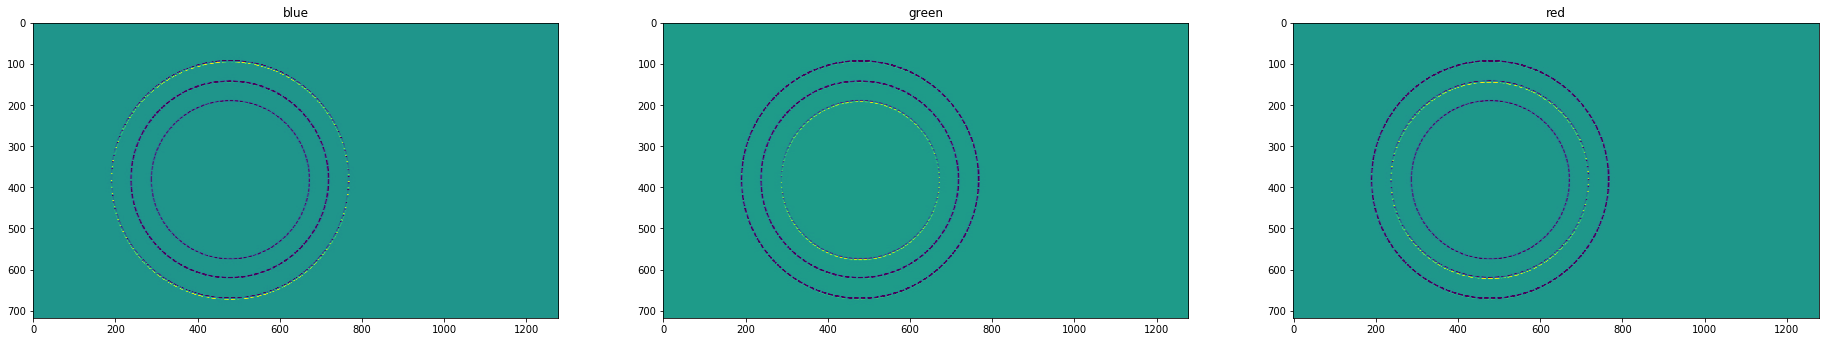

In [0]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(32, 32))
columns = 3
rows = 1

ax = fig.add_subplot(rows, columns, 1)
ax.set_title("blue")
plt.imshow(blue)
ax = fig.add_subplot(rows, columns, 2)
ax.set_title("green")
plt.imshow(green)
ax = fig.add_subplot(rows, columns, 3)
ax.set_title("red")
plt.imshow(red)

plt.show()

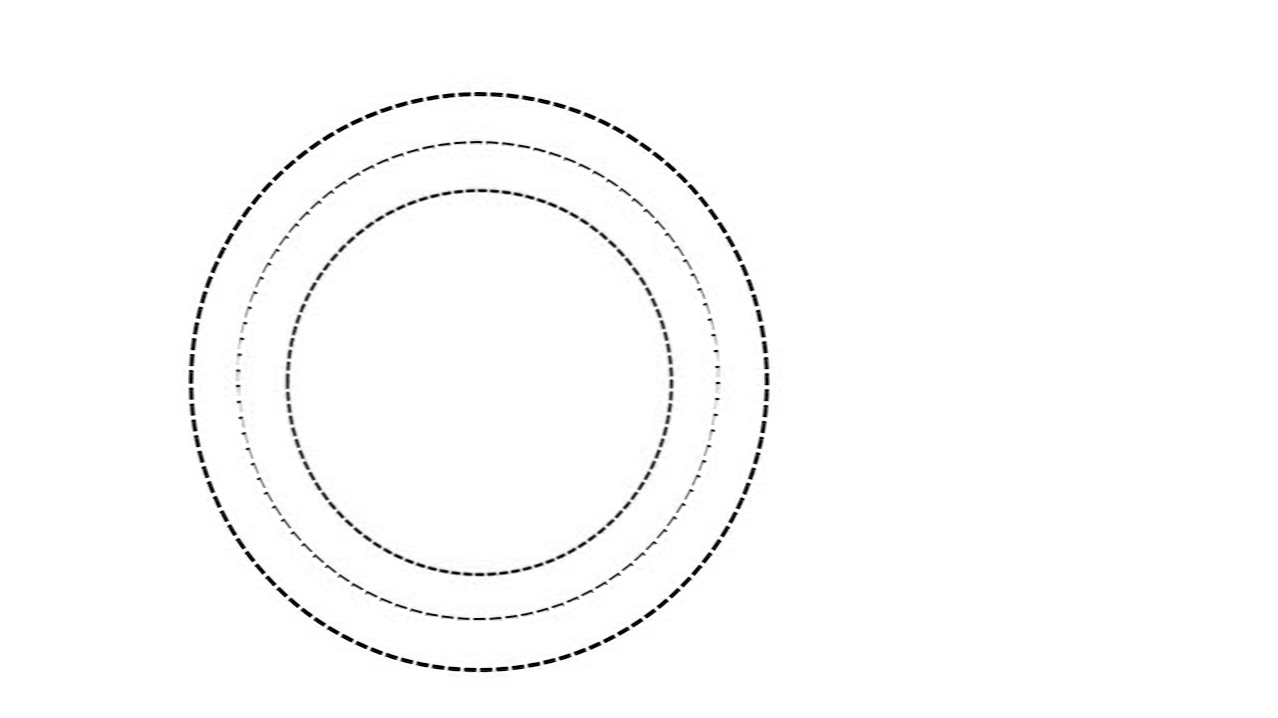

In [0]:
cv2_imshow(red)

# Colour detection using boundaries

In [0]:
boundaries = [
	([0, 0, 80], [50, 56, 255]),
	([8, 0, 0], [250, 12, 50]),
	([0, 4, 0], [50, 250, 50]),
	
] 

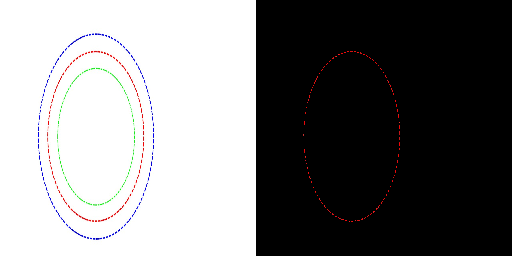

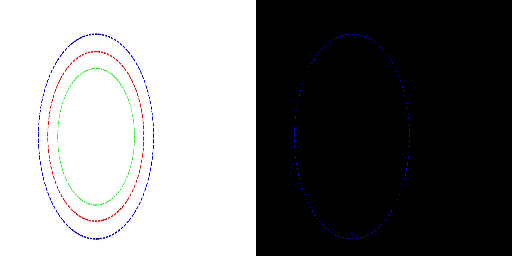

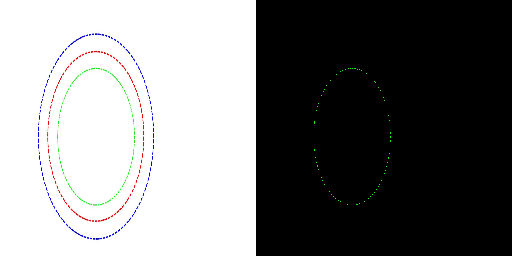

In [0]:
# loop over the boundaries
for (lower, upper) in boundaries:
	# create NumPy arrays from the boundaries
	lower = np.array(lower, dtype = "uint8")
	upper = np.array(upper, dtype = "uint8")
 
	# find the colors within the specified boundaries and apply
	# the mask
	mask = cv2.inRange(image, lower, upper)
	output = cv2.bitwise_and(image, image, mask = mask)
 
	# show the images
	cv2_imshow(np.hstack([image, output]))
	cv2.waitKey(0)